<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/computer_vision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
#importing libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize


## Reading the Folders 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir(path='.')

def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName)
    allFiles = list()
    
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


dirName = '/content/drive/MyDrive/training'

listOfFiles = getListOfFiles(dirName)


listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]


for i in listOfFiles:
    print(i)    

/content/drive/MyDrive/training/stone1/stone1-a-p001.png
/content/drive/MyDrive/training/stone1/stone1-a-p007.png
/content/drive/MyDrive/training/stone1/stone1-a-p005.png
/content/drive/MyDrive/training/stone1/stone1-a-p004.png
/content/drive/MyDrive/training/stone1/stone1-a-p002.png
/content/drive/MyDrive/training/stone1/stone1-a-p003.png
/content/drive/MyDrive/training/stone1/stone1-a-p006.png
/content/drive/MyDrive/training/stone1/stone1-a-p018.png
/content/drive/MyDrive/training/stone1/stone1-a-p009.png
/content/drive/MyDrive/training/stone1/stone1-a-p013.png
/content/drive/MyDrive/training/stone1/stone1-a-p020.png
/content/drive/MyDrive/training/stone1/stone1-a-p015.png
/content/drive/MyDrive/training/stone1/stone1-a-p014.png
/content/drive/MyDrive/training/stone1/stone1-a-p021.png
/content/drive/MyDrive/training/stone1/stone1-a-p016.png
/content/drive/MyDrive/training/stone1/stone1-a-p010.png
/content/drive/MyDrive/training/stone1/stone1-a-p011.png
/content/drive/MyDrive/training

In [ ]:
#certain 4 folders
folder_names = ["canvas1", "cushion1", "linsseeds1", "sand1","seat2","stone1"]
listOfFiles = [f for f in listOfFiles if any([n in f for n in folder_names])]
print(listOfFiles)

['/content/drive/MyDrive/training/stone1/stone1-a-p001.png', '/content/drive/MyDrive/training/stone1/stone1-a-p007.png', '/content/drive/MyDrive/training/stone1/stone1-a-p005.png', '/content/drive/MyDrive/training/stone1/stone1-a-p004.png', '/content/drive/MyDrive/training/stone1/stone1-a-p002.png', '/content/drive/MyDrive/training/stone1/stone1-a-p003.png', '/content/drive/MyDrive/training/stone1/stone1-a-p006.png', '/content/drive/MyDrive/training/stone1/stone1-a-p018.png', '/content/drive/MyDrive/training/stone1/stone1-a-p009.png', '/content/drive/MyDrive/training/stone1/stone1-a-p013.png', '/content/drive/MyDrive/training/stone1/stone1-a-p020.png', '/content/drive/MyDrive/training/stone1/stone1-a-p015.png', '/content/drive/MyDrive/training/stone1/stone1-a-p014.png', '/content/drive/MyDrive/training/stone1/stone1-a-p021.png', '/content/drive/MyDrive/training/stone1/stone1-a-p016.png', '/content/drive/MyDrive/training/stone1/stone1-a-p010.png', '/content/drive/MyDrive/training/stone1

In [ ]:
# Read the images 
img = [io.imread(file) for file in listOfFiles]

(576, 576)

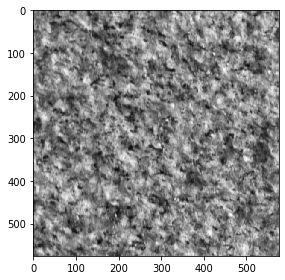

In [ ]:
io.imshow(img[0])
img[0].shape

# change size 


In [ ]:
img=np.array(img)
img.shape

(180, 576, 576)

In [ ]:
new_img=[]
for i in img:
    new_img.append(i)

In [ ]:
new_img=np.array(new_img)
new_img.shape

(180, 576, 576)

In [ ]:
# Resize the images
from skimage.transform import resize
xx=[]
new_img=[]
for i in img:
    new_img.append(resize(i,(32,32)))

In [ ]:
new_img=np.array(new_img)
new_img.shape

(180, 32, 32)

In [ ]:
#"canvas1", "cushion1", "linsseeds1", "sand1","seat2","stone1"
#Preparing label for multiclass
ymultiii = []
for f in listOfFiles:
    if 'canvas1' in f:
        ymultiii.append('0')
    if 'cushion1' in f:
        ymultiii.append('1')
    if 'linsseeds1' in f:
        ymultiii.append('2')
    if 'sand1' in f:
        ymultiii.append('3')
    if 'seat2' in f:
        ymultiii.append('4')
    if 'stone1' in f:
        ymultiii.append('5')                

In [ ]:
np.array(ymultiii).shape

(180,)

concatenate pairs

In [ ]:
new_data=[]
new_label=[]
for i in range(new_img.shape[0]-1):
  for j in range(i+1 , new_img.shape[0]):
    new_data.append( np.concatenate((new_img[i].flatten(),new_img[j].flatten())))
    if ymultiii[i]==ymultiii[j]:
      new_label.append(1)
    else:
      new_label.append(0)

In [ ]:
new_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
np.shape(new_label)

(16110,)

In [ ]:
x=np.array(new_data)
x.shape

(16110, 2048)

In [ ]:
# split the data in training to train and validate
X_train, X_mul, y_train, y_mul = train_test_split(x,new_label, train_size=0.8, random_state=42)

# **here i tried 3 methods cc/conv/ssd either with normalization =yes and normalization = no then i choosed the higher accuracy that will be 0.5596679081315953
**with method =cc and normalization yes that looks the same as wethod =ssd and normalization yes **

In [ ]:
def correlation_coefficient(img1,img2):
    result = np.dot(img1,img2)
    return result

In [ ]:
correlation_coefficient(X_train[0][:1024],X_train[0][1024:])

249.6029853902345

In [ ]:
def ssd(imageA, imageB):
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	return err

In [ ]:
def norm(img):
    mean_data=np.mean(img)
    std_data=np.std(img, ddof=1)
    return (img-mean_data)/(std_data)

In [ ]:
def convolution2d(img1,img2):
    b1=np.flip(img1)
    #B= np.flip(b1,0)
    s=sum(np.multiply(b1,img2))
    return s

In [ ]:
new_img = np.array(new_img)
new_img = new_img.flatten().reshape(new_img.shape[0],-1)
for i in new_img:
    def compare_images(imageA, imageB, method='cc', normalize='n'):

        if normalize == 'y':
            imageA = norm(imageA)
            imageB = norm(imageB)
        if method == 'cc':
            res= correlation_coefficient(imageA,imageB)
        elif method == 'conv':
            res= convolution2d(imageA,imageB)
        elif method == 'ssd':
            res= ssd(imageA,imageB)
        return res

In [ ]:
X_train[0].shape

(2048,)

In [ ]:
score_cc_n=[]
for i in X_train:
       score_cc_n.append(compare_images(i[:1024], i[1024:],method='cc', normalize='n'))

In [ ]:
from statistics import mean
threshold_score_cc_n= mean(score_cc_n)
threshold_score_cc_n

249.98833028165228

In [ ]:
y_match_pred = []
for i in range(len(score_cc_n)):
    if score_cc_n[i] > threshold_score_cc_n:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.5243637492240845

In [ ]:
score_cc_y=[]
for i in X_train:
       score_cc_y.append(compare_images(i[:1024], i[1024:],method='cc', normalize='y'))

In [ ]:
from statistics import mean
threshold_score_cc_y= mean(score_cc_y)
threshold_score_cc_y

8.083710546082582

In [ ]:
y_match_pred = []
for i in range(len(score_cc_y)):
    if score_cc_y[i] > threshold_score_cc_y:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

**highest score will be compared with MLP**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.5596679081315953

In [ ]:
score_ssd_n=[]
for i in X_train:
       score_ssd_n.append(compare_images(i[:1024], i[1024:],method='ssd', normalize='n'))

In [ ]:
from statistics import mean
threshold_score_ssd_n= mean(score_ssd_n)
threshold_score_ssd_n

7.453350127237031

In [ ]:
y_match_pred = []
for i in range(len(score_ssd_n)):
    if score_ssd_n[i] < threshold_score_ssd_n:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.48052451893234016

In [ ]:
score_ssd_y=[]
for i in X_train:
       score_ssd_y.append(compare_images(i[:1024], i[1024:],method='ssd', normalize='y'))

In [ ]:
from statistics import mean
threshold_score_ssd_y= mean(score_ssd_y)
threshold_score_ssd_y

2029.8325789078349

In [ ]:
y_match_pred=[]
for i in range(len(score_ssd_y)):
    if score_ssd_y[i] < threshold_score_ssd_y:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.5596679081315953

In [ ]:
score_conv_n=[]
for i in X_train:
       score_conv_n.append(compare_images(i[:1024], i[1024:],method='conv', normalize='n'))

In [ ]:
from statistics import mean
thresholds_score_conv_n= mean(score_conv_n)
thresholds_score_conv_n

249.9689975645767

In [ ]:
y_match_pred=[]
for i in range(len(score_conv_n)):
    if score_conv_n[i] > thresholds_score_conv_n:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.4802141527001862

In [ ]:
score_conv_y=[]
for i in X_train:
       score_conv_y.append(compare_images(i[:1024], i[1024:],method='conv', normalize='y'))

In [ ]:
from statistics import mean
thresholds_score_conv_y= mean(score_conv_y)
thresholds_score_conv_y

-5.023344498550528

In [ ]:
y_match_pred=[]
for i in range(len(score_conv_y)):
    if score_conv_y[i] > thresholds_score_conv_y:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
y_match_pred=np.array(y_match_pred)
y_match_pred.shape

(12888,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_match_pred)

0.4753258845437616

# **1.4 MLP**

#read training and check mlp accuracy with the MLP
# first under sampling data to be balanced

In [ ]:
#X_train, X_mul, y_train, y_mul = train_test_split(x,new_label, train_size=0.8, random_state=42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus= rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Iteration 0, loss = 0.6941056953433785
Iteration 1, loss = 0.6910421296179566
Iteration 2, loss = 0.6904119352465962
Iteration 3, loss = 0.6880389255746672
Iteration 4, loss = 0.6877836679855849
Iteration 5, loss = 0.686877585028234
Iteration 6, loss = 0.6860145286812405
Iteration 7, loss = 0.6850693539127876
Iteration 8, loss = 0.6838132200956967
Iteration 9, loss = 0.6834501026528285
Iteration 10, loss = 0.6824356349133919
Iteration 11, loss = 0.6812766487737866
Iteration 12, loss = 0.6796506928944723
Iteration 13, loss = 0.6789841609094832
Iteration 14, loss = 0.6791946554593569
Iteration 15, loss = 0.6776275155350399
Iteration 16, loss = 0.6765392057277745
Iteration 17, loss = 0.6764050944004024
Iteration 18, loss = 0.6750453313856587
Iteration 19, loss = 0.6744393086298244
Iteration 20, loss = 0.6735306978461768
Iteration 21, loss = 0.6720473613627577
Iteration 22, loss = 0.6729577044269959
Iteration 23, loss = 0.6703459161986259
Iteration 24, loss = 0.669691060819506
Iteration 25

Text(0, 0.5, 'accuracy_score')

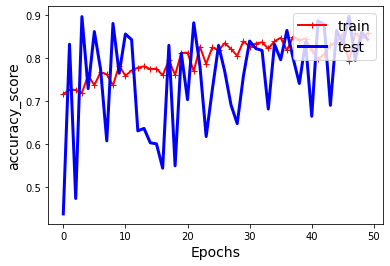

In [ ]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(x_rus, y_rus)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(accuracy_score(y_rus, nn_clf.predict(x_rus)))
    test_errors.append(accuracy_score(y_mul, nn_clf.predict(X_mul)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("accuracy_score", fontsize=14)

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
  print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))

Number of layers 3
Layer 0: Weights (2048, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


**as training accuracy is higher than validation so it means that we have overfitting in our model **

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = nn_clf.predict(x_rus)
y_pred_test = nn_clf.predict(X_mul)
print('Classifier accuracy on the training set is {0}'.format(accuracy_score(y_rus, y_pred)))
print('Classifier accuracy on the validate set is {0} '.format(accuracy_score(y_mul, y_pred_test)))

Classifier accuracy on the training set is 0.7341591233920914
Classifier accuracy on the validate set is 0.7104283054003724 


# **1.5**

#reading tesing data then resize,put images in pairs
#accuracy_score 0.636 at MLP in test but in train it was 0.73 so this means overfitting no generalization
#accuracy score 0.57 at image match that gives higher accuracy before,, then that morethan in training data so it mean model is more generalize
#MLP is taking shorter time in running than imagematch with any method

In [ ]:
os.listdir(path='.')

def getListOfFiles(textures):
    
    listOfFile = os.listdir(textures)
    allFiles = list()
    
    for entry in listOfFile:
        fullPath = os.path.join(textures, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


#dirName = 'C:/Users/Debi/Desktop/training/training'
textures_testing = '/content/drive/MyDrive/testing'


listOfFiles = getListOfFiles(textures_testing)


listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(textures_testing):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]


for i in listOfFiles:
    print(i) 

/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p031.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p032.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p033.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p034.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p037.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p036.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p035.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p038.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p040.png
/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p039.png
/content/drive/MyDrive/testing/sand1/sand1-a-p031.png
/content/drive/MyDrive/testing/sand1/sand1-a-p032.png
/content/drive/MyDrive/testing/sand1/sand1-a-p036.png
/content/drive/MyDrive/testing/sand1/sand1-a-p035.png
/content/drive/MyDrive/testing/sand1/sand1-a-p038.png
/content/drive/MyDrive/testing/sand1/sand1-a-p040.png
/content/drive/MyDrive/testing/sand1/sand1-a-p

In [ ]:
#certain 4 folders
folder_names = ["canvas1", "cushion1", "linsseeds1", "sand1","seat2","stone1"]
listOfFiles = [f for f in listOfFiles if any([n in f for n in folder_names])]
print(listOfFiles)

['/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p031.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p032.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p033.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p034.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p037.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p036.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p035.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p038.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p040.png', '/content/drive/MyDrive/testing/linsseeds1/linseeds1-a-p039.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p031.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p032.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p036.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p035.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p038.png', '/content/drive/MyDrive/testing/sand1/sand1-a-p040.png

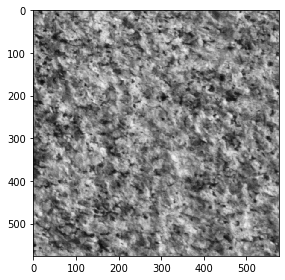

In [ ]:
img = [io.imread(file) for file in listOfFiles]
io.imshow(img[39])

In [ ]:
img=np.array(img)
img.shape

(60, 576, 576)

In [ ]:
new_img=[]
for i in img:
    new_img.append(i)
new_img=np.array(new_img)
new_img.shape  

(60, 576, 576)

In [ ]:
  # Resize the images
from skimage.transform import resize
xx=[]
new_img=[]
for i in img:
    new_img.append(resize(i,(32,32)))
 

In [ ]:
new_img=np.array(new_img)
new_img.shape   

(60, 32, 32)

In [ ]:
#"canvas1", "cushion1", "linsseeds1", "sand1","seat2","stone1"
#Preparing label for multiclass
ymultiii = []
for f in listOfFiles:
    if 'canvas1' in f:
        ymultiii.append('0')
    if 'cushion1' in f:
        ymultiii.append('1')
    if 'linsseeds1' in f:
        ymultiii.append('2')
    if 'sand1' in f:
        ymultiii.append('3')
    if 'seat2' in f:
        ymultiii.append('4')
    if 'stone1' in f:
        ymultiii.append('5')                

In [ ]:
np.array(ymultiii).shape

(60,)

In [ ]:
new_data=[]
new_label_1=[]
for i in range(new_img.shape[0]-1):
  for j in range(i+1 , new_img.shape[0]):
    new_data.append( np.concatenate((new_img[i].flatten(),new_img[j].flatten())))
    if ymultiii[i]==ymultiii[j]:
      new_label_1.append(1)
    else:
      new_label_1.append(0)

In [ ]:
new_label_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print('Classifier accuracy_score {}'.format(accuracy_score(new_label_1, nn_clf.predict(X=new_data))))


Classifier accuracy_score 0.6367231638418079


In [ ]:
score_cc_y=[]
for i in new_data:
       score_cc_y.append(compare_images(i[:1024], i[1024:],method='cc', normalize='y'))

In [ ]:
y_match_pred = []
for i in range(len(score_cc_y)):
    if score_cc_y[i] > threshold_score_cc_y:
        y_match_pred.append(1)
    else:
        y_match_pred.append(0)

In [ ]:
print('accuracy_score score accuracy {0} '.format(accuracy_score(new_label_1, y_match_pred)))

accuracy_score score accuracy 0.5774011299435028 


# **feature preprocessing**

#using la place to Find the edges of an image efilter then pca for feature reduction then 
#undersampling for embalance data
#no improvment shown in mlp accuracy after filter

In [ ]:
import skimage
from skimage import filters
X_filtered = skimage.filters.laplace(x, ksize=5)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_filtered_scaled = pca.fit_transform(X_filtered)

In [ ]:
X_train, X_mul, y_train, y_mul = train_test_split(X_filtered_scaled,new_label, train_size=0.8, random_state=42)

In [ ]:
X_train.shape

(12888, 32)

In [ ]:
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus= rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Iteration 0, loss = 0.9660182713534068
Iteration 1, loss = 0.898587989110367
Iteration 2, loss = 0.8427552290443356
Iteration 3, loss = 0.8056828661897107
Iteration 4, loss = 0.7818957285484821
Iteration 5, loss = 0.7656092972057333
Iteration 6, loss = 0.754001045287984
Iteration 7, loss = 0.7455473672096091
Iteration 8, loss = 0.7389962531826066
Iteration 9, loss = 0.73325388384327
Iteration 10, loss = 0.7283652565968041
Iteration 11, loss = 0.7240771546340815
Iteration 12, loss = 0.7202163948475363
Iteration 13, loss = 0.7167943363611038
Iteration 14, loss = 0.7135131390364166
Iteration 15, loss = 0.7106322708336208
Iteration 16, loss = 0.7078884928597194
Iteration 17, loss = 0.7054480076674712
Iteration 18, loss = 0.7031339014319496
Iteration 19, loss = 0.7010723717111741
Iteration 20, loss = 0.6989973799008106
Iteration 21, loss = 0.6971412492875317
Iteration 22, loss = 0.695402797967768
Iteration 23, loss = 0.6937828011195651
Iteration 24, loss = 0.6922408297398431
Iteration 25, l

Text(0, 0.5, ' score')

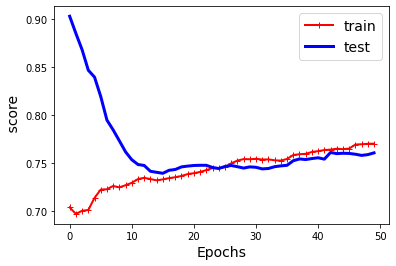

In [ ]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd',hidden_layer_sizes=50)

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(x_rus, y_rus)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(accuracy_score(y_rus, nn_clf.predict(x_rus)))
    test_errors.append(accuracy_score(y_mul, nn_clf.predict(X_mul)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel(" score", fontsize=14)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = nn_clf.predict(x_rus)
y_pred_test = nn_clf.predict(X_mul)
print('Classifier accuracy on the training {0} '.format(accuracy_score(y_rus, y_pred)))
print('Classifier accuracy on the test {0}'.format(accuracy_score(y_mul, y_pred_test)))

Classifier accuracy on the training 0.5929013816102906 
Classifier accuracy on the test 0.5782122905027933
